<a href="https://colab.research.google.com/github/mayalajesus/mayalajesus/blob/main/Data%20Science/Pinguins/pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**



*   limpar os dados e explicar por que o fez
*   **análise comparativa** de dados biométricos (comprimento do bico, profundidade do bico, comprimento da nadadeira e peso) dos pinguins por espécie
*   para cada uma das espécies **se o sexo influencia** no que foi pedido anteriormente
*   se existe alguma relação entre a espécie de pinguim e a ilha em que eles moram






#### importando bibliotecas

In [16]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

#### carregando dados

In [17]:
# Carregando conjunto de dados
pinguins = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins.csv')
pinguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#### alterando o nome das colunas para português (melhora o entendimento)

In [18]:
#Alterando o nome das colunas para português (melhora o entendimento)
pinguins.rename(columns={
    'Unnamed: 0': 'Indice',
    'species': 'especies',
    'island': 'ilha',
    'bill_length_mm': 'Comprimento do Bico (mm)',
    'bill_depth_mm': 'Profundidade do Bico (mm)',
    'flipper_length_mm': 'Comprimento da Nadadeira (mm)',
    'body_mass_g': 'Massa Corporal (kg)',
    'sex': 'sexo',
    'year': 'Ano-coleta'
}, inplace=True)

#### limpando dados

In [19]:
# Eliminando colunas desnecessárias
pinguins = pinguins.drop(['Indice'], axis=1)
pinguins = pinguins.drop(['Ano-coleta'], axis=1)

In [20]:
# Colunas para verificar os valores NaN
pinguins_clean = ['Comprimento do Bico (mm)', 'Profundidade do Bico (mm)', 'Comprimento da Nadadeira (mm)', 'Massa Corporal (kg)']

# Verificar se há valores NaN nas colunas especificadas
pinguins_nan_rows = pinguins[pinguins_clean].isna().any(axis=1)

# DataFrame sem as linhas NaN
pinguins = pinguins[~pinguins_nan_rows]

pinguins.head()

,especies,ilha,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg),sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [21]:
# Verificnado o tipo das colunas
pinguins.dtypes

especies                          object
ilha                              object
Comprimento do Bico (mm)         float64
Profundidade do Bico (mm)        float64
Comprimento da Nadadeira (mm)    float64
Massa Corporal (kg)              float64
sexo                              object
dtype: object

#### transformando a massa corporal de g para kg

In [22]:
# Formatando gramas para quilogramas na coluna 'Massa Corporal (kg)'
pinguins['Massa Corporal (kg)'] = pinguins['Massa Corporal (kg)'] / 100
pinguins.head()

,especies,ilha,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg),sexo
0,Adelie,Torgersen,39.1,18.7,181.0,37.5,male
1,Adelie,Torgersen,39.5,17.4,186.0,38.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,32.5,female
4,Adelie,Torgersen,36.7,19.3,193.0,34.5,female
5,Adelie,Torgersen,39.3,20.6,190.0,36.5,male


#### análise por espécie

In [58]:
# Selecionar as espécies únicas
pinguins_especies = pd.DataFrame(pinguins['especies'].unique(), columns=['Espécies'])
pinguins_especies

,Espécies
0,Adelie
1,Gentoo
2,Chinstrap


In [ ]:
# Contagem de ocorrências de cada espécie
contagem_especies = pinguins['especies'].value_counts()

# Crie um gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(pinguins_especies['Espécies'], contagem_especies)
plt.xlabel('Espécies')
plt.ylabel('Contagem')
plt.title('Contagem de Pinguins por Espécies')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [60]:
# Espécie 1: Adelie
pinguins_adelie = pinguins[pinguins['especies'] == 'Adelie']

In [61]:
# Espécie 2: Gentoo
pinguins_gentoo = pinguins[pinguins['especies'] == 'Gentoo']

In [62]:
# Espécie 3: Chinstrap
pinguins_chinstrap = pinguins[pinguins['especies'] == 'Chinstrap']

In [63]:
# Amostragem aleatória
# Reduzindo aleatoriamente o tamanho das classes majoritárias
n_amostras = min(len(pinguins_adelie), len(pinguins_gentoo), len(pinguins_chinstrap))
pinguins_adelie = resample(pinguins_adelie, replace=False, n_samples=n_amostras, random_state=42)
pinguins_gentoo = resample(pinguins_gentoo, replace=False, n_samples=n_amostras, random_state=42)
pinguins_chinstrap = resample(pinguins_chinstrap, replace=False, n_samples=n_amostras, random_state=42)

# Combinando as classes amostradas e a classe minoritária
pinguins = pd.concat([pinguins_adelie, pinguins_gentoo, pinguins_chinstrap])


In [64]:
pinguins_adelie.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,68.000000,68.000000,68.000000,68.000000
mean,39.217647,18.367647,188.882353,37.242647
std,2.557105,1.240780,6.407853,4.243733
min,33.100000,16.100000,172.000000,29.000000
25%,37.450000,17.450000,184.750000,34.000000
50%,39.200000,18.400000,190.000000,37.375000
75%,41.100000,19.000000,194.000000,39.500000
max,46.000000,21.500000,199.000000,47.750000


In [ ]:
pinguins_gentoo.describe()

In [ ]:
pinguins_chinstrap.describe()

In [ ]:
# Contagem de ocorrências de cada espécie
contagem_especies = pinguins['especies'].value_counts()

# Crie um gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(pinguins_especies['Espécies'], contagem_especies)
plt.xlabel('Espécies')
plt.ylabel('Contagem')
plt.title('Contagem de Pinguins por Espécies')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

#### análise por sexo

In [68]:
# Espécie Adelie
## Selecionar feminino
pinguins_adelie_feminino = pinguins_adelie[pinguins_adelie['sexo'] == 'female']

## Selecionar masculino
pinguins_adelie_masculino = pinguins_adelie[pinguins_adelie['sexo'] == 'male']


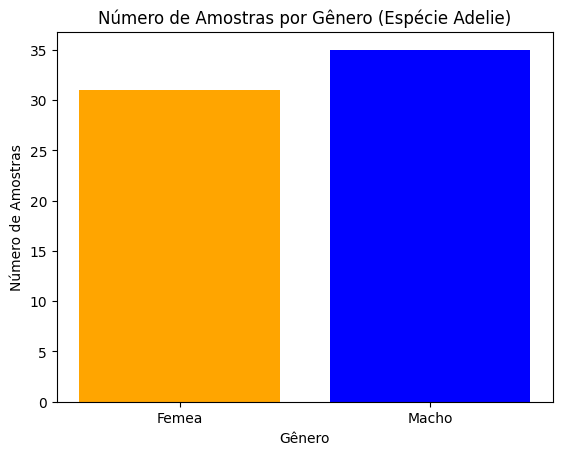

In [69]:
# Contar o número de amostras de cada gênero
num_feminino = len(pinguins_adelie_feminino)
num_masculino = len(pinguins_adelie_masculino)

# Definir os rótulos para o eixo x
generos = ['Femea', 'Macho']

# Número de amostras para cada gênero
amostras = [num_feminino, num_masculino]

# Criar o gráfico de barras
plt.bar(generos, amostras, color=['orange', 'blue'])

# Adicionar título e rótulos aos eixos
plt.title('Número de Amostras por Gênero (Espécie Adelie)')
plt.xlabel('Gênero')
plt.ylabel('Número de Amostras')

# Exibir o gráfico
plt.show()

In [70]:
# Amostragem aleatória
# Reduzindo aleatoriamente o tamanho das classes majoritárias
n_amostras_sex = min(len(pinguins_adelie_feminino), len(pinguins_adelie_masculino))
pinguins_adelie_feminino = resample(pinguins_adelie_feminino, replace=False, n_samples=n_amostras_sex, random_state=42)
pinguins_adelie_masculino = resample(pinguins_adelie_masculino, replace=False, n_samples=n_amostras_sex, random_state=42)

# Combinando as classes amostradas e a classe minoritária
pinguins_adelie_sexo = pd.concat([pinguins_adelie_feminino, pinguins_adelie_masculino])


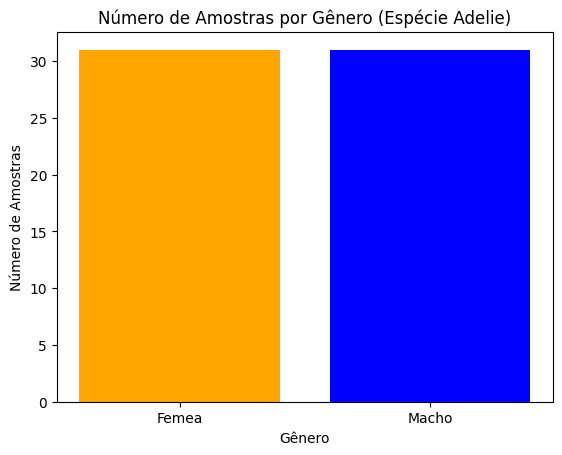

In [71]:
# Contar o número de amostras de cada gênero
num_feminino = len(pinguins_adelie_feminino)
num_masculino = len(pinguins_adelie_masculino)

# Definir os rótulos para o eixo x
generos = ['Femea', 'Macho']

# Número de amostras para cada gênero
amostras = [num_feminino, num_masculino]

# Criar o gráfico de barras
plt.bar(generos, amostras, color=['orange', 'blue'])

# Adicionar título e rótulos aos eixos
plt.title('Número de Amostras por Gênero (Espécie Adelie)')
plt.xlabel('Gênero')
plt.ylabel('Número de Amostras')

# Exibir o gráfico
plt.show()

In [72]:
pinguins_adelie_feminino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,31.000000,31.000000,31.000000,31.000000
mean,37.864516,17.670968,187.419355,34.048387
std,2.202506,1.009354,6.443468,2.651587
min,33.100000,16.100000,172.000000,29.000000
25%,36.350000,16.950000,184.500000,32.000000
50%,38.100000,17.600000,187.000000,34.000000
75%,39.500000,18.350000,191.000000,35.750000
max,42.200000,20.700000,199.000000,39.000000


In [73]:
pinguins_adelie_masculino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,31.000000,31.000000,31.000000,31.000000
mean,40.403226,19.100000,190.483871,39.862903
std,2.323573,1.077033,5.898423,3.004052
min,35.100000,17.000000,178.000000,34.250000
25%,39.050000,18.450000,185.000000,38.000000
50%,40.700000,18.900000,192.000000,39.500000
75%,41.550000,19.500000,195.000000,42.000000
max,46.000000,21.500000,199.000000,46.000000


In [74]:
# Espécie Gentoo
## Selecionar feminino
pinguins_gentoo_feminino = pinguins_gentoo[pinguins_gentoo['sexo'] == 'female']

## Selecionar masculino
pinguins_gentoo_masculino = pinguins_chinstrap[pinguins_chinstrap['sexo'] == 'male']


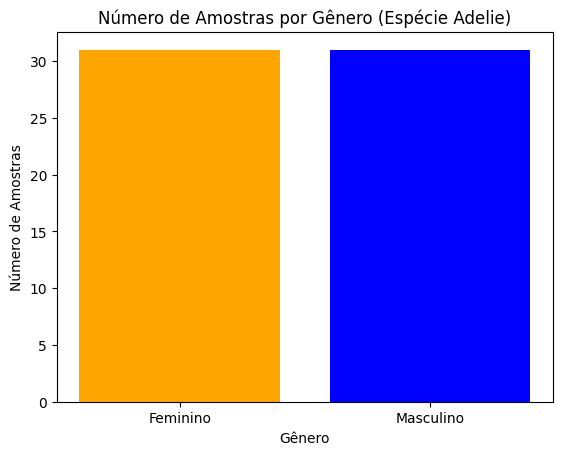

In [75]:
# Contar o número de amostras de cada gênero
num_feminino_g = len(pinguins_gentoo_feminino)
num_masculino_g = len(pinguins_gentoo_masculino)

# Definir os rótulos para o eixo x
generos = ['Feminino', 'Masculino']

# Número de amostras para cada gênero
amostras = [num_feminino, num_masculino]

# Criar o gráfico de barras
plt.bar(generos, amostras, color=['orange', 'blue'])

# Adicionar título e rótulos aos eixos
plt.title('Número de Amostras por Gênero (Espécie Adelie)')
plt.xlabel('Gênero')
plt.ylabel('Número de Amostras')

# Exibir o gráfico
plt.show()

In [76]:
pinguins_gentoo_feminino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,34.000000,34.000000,34.000000,34.000000
mean,45.558824,14.132353,212.882353,46.882353
std,2.339919,0.560693,4.043436,2.873755
min,40.900000,13.100000,203.000000,39.500000
25%,43.525000,13.700000,210.000000,45.562500
50%,45.600000,14.100000,213.000000,47.000000
75%,47.425000,14.500000,215.750000,48.875000
max,50.500000,15.200000,220.000000,52.000000


In [77]:
pinguins_gentoo_masculino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,34.000000,34.000000,34.000000,34.000000
mean,51.094118,19.252941,199.911765,39.389706
std,1.564558,0.761273,5.976558,3.621376
min,48.500000,17.500000,187.000000,32.500000
25%,50.050000,18.800000,196.000000,37.312500
50%,50.950000,19.300000,200.500000,39.500000
75%,51.975000,19.800000,203.000000,41.000000
max,55.800000,20.800000,212.000000,48.000000


In [78]:
# Espécie Chinstrap
## Selecionar feminino
pinguins_chinstrap_feminino = pinguins_chinstrap[pinguins_chinstrap['sexo'] == 'female']

## Selecionar masculino
pinguins_chinstrap_masculino = pinguins_chinstrap[pinguins_chinstrap['sexo'] == 'male']

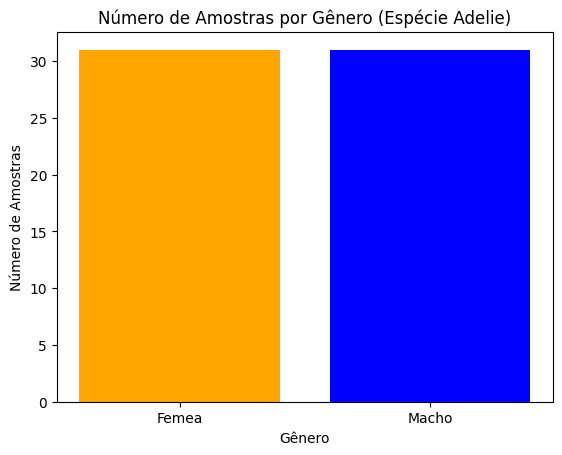

In [79]:
# Contar o número de amostras de cada gênero
num_feminino_g = len(pinguins_chinstrap_feminino)
num_masculino_g = len(pinguins_chinstrap_masculino)

# Definir os rótulos para o eixo x
generos = ['Femea', 'Macho']

# Número de amostras para cada gênero
amostras = [num_feminino, num_masculino]

# Criar o gráfico de barras
plt.bar(generos, amostras, color=['orange', 'blue'])

# Adicionar título e rótulos aos eixos
plt.title('Número de Amostras por Gênero (Espécie Adelie)')
plt.xlabel('Gênero')
plt.ylabel('Número de Amostras')

# Exibir o gráfico
plt.show()

In [80]:
pinguins_chinstrap_feminino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,34.000000,34.000000,34.000000,34.000000
mean,46.573529,17.588235,191.735294,35.272059
std,3.108669,0.781128,5.754096,2.853339
min,40.900000,16.400000,178.000000,27.000000
25%,45.425000,17.000000,187.250000,33.625000
50%,46.300000,17.650000,192.000000,35.500000
75%,47.375000,18.050000,195.750000,36.937500
max,58.000000,19.400000,202.000000,41.500000


In [81]:
pinguins_chinstrap_masculino.describe()

,Comprimento do Bico (mm),Profundidade do Bico (mm),Comprimento da Nadadeira (mm),Massa Corporal (kg)
count,34.000000,34.000000,34.000000,34.000000
mean,51.094118,19.252941,199.911765,39.389706
std,1.564558,0.761273,5.976558,3.621376
min,48.500000,17.500000,187.000000,32.500000
25%,50.050000,18.800000,196.000000,37.312500
50%,50.950000,19.300000,200.500000,39.500000
75%,51.975000,19.800000,203.000000,41.000000
max,55.800000,20.800000,212.000000,48.000000


#### análise por ilha

In [47]:
# Selecionando as ilhas onde a especie Adelie habita
pinguins_adelie_ilha = pinguins_adelie['ilha'].unique()
pinguins_adelie_ilha

array(['Torgersen', 'Dream', 'Biscoe'], dtype=object)

In [48]:
# Contar quantos pinguins em cada ilha por espécie
## Adelie
len_torgersen_adelie = len(pinguins_adelie[pinguins_adelie['ilha'] == 'Torgersen'])
len_torgersen_adelie

len_biscoe_adelie = len(pinguins_adelie[pinguins_adelie['ilha'] == 'Biscoe'])
len_biscoe_adelie

len_dream_adelie = len(pinguins_adelie[pinguins_adelie['ilha'] == 'Dream'])
len_dream_adelie

25

In [49]:
# Selecionar as ilhas onde a especie Gentoo habita
pinguins_gentoo_ilha =pinguins_gentoo['ilha'].unique()
pinguins_gentoo_ilha

array(['Biscoe'], dtype=object)

In [50]:
# Contar quantos pinguins em cada ilha por espécie
## Gentoo
len_biscoe_gentoo = len(pinguins_gentoo[pinguins_gentoo['ilha'] == 'Biscoe'])
len_biscoe_gentoo

68

In [51]:
# Selecionar as ilhas onde a especie Chinstrap habita
pinguis_chinstrap_ilha = pinguins_chinstrap['ilha'].unique()
pinguis_chinstrap_ilha

array(['Dream'], dtype=object)

In [52]:
# Contar quantos pinguins em cada ilha por espécie
## Chinstrap
len_dream_chinstrap = len(pinguins_chinstrap[pinguins_chinstrap['ilha'] == 'Dream'])
len_dream_chinstrap

68

In [53]:
# Criando a tabela com distribuição de espécie por ilha
tabela_ilha = pd.DataFrame({
    'Ilhas': ['Torgersen', 'Biscoe', 'Dream'],
    'Adelie': [len_torgersen_adelie, len_biscoe_adelie, len_dream_adelie],
    'Gentoo': [0, len_biscoe_gentoo, 0],
    'Chinstrap': [0, 0, len_dream_chinstrap]
})

tabela_ilha = tabela_ilha.reset_index(drop=True)
tabela_ilha

,Ilhas,Adelie,Gentoo,Chinstrap
0,Torgersen,21,0,0
1,Biscoe,22,68,0
2,Dream,25,0,68


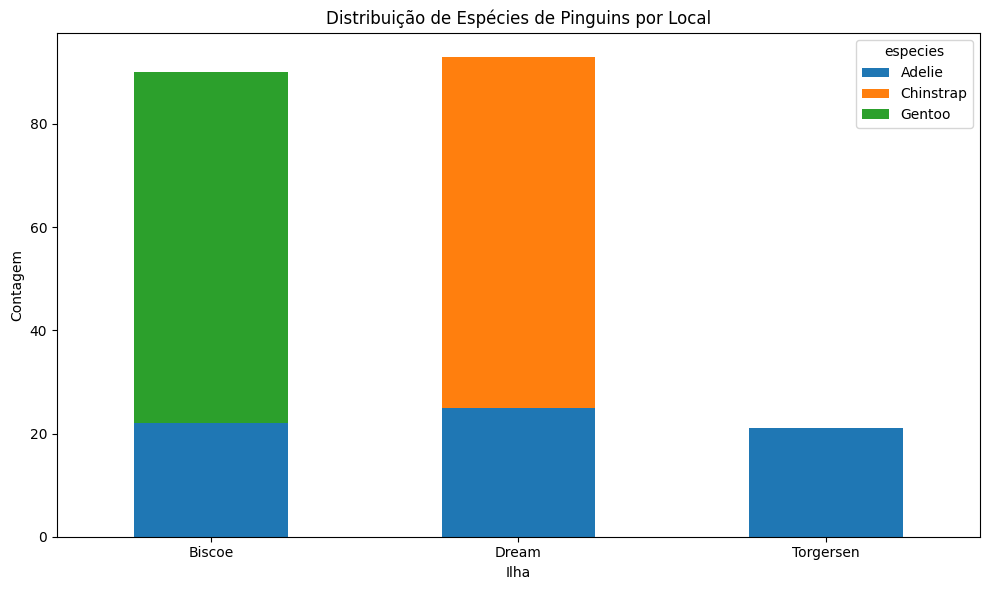

In [82]:
# Agrupar dados por espécie e ilha, contando o número de ocorrências
species_island_counts = pinguins.groupby(['ilha', 'especies']).size().unstack().fillna(0)

# Plotar o gráfico de barras empilhadas
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ilha')
plt.ylabel('Contagem')
plt.title('Distribuição de Espécies de Pinguins por Local')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
# Criando a tabela com as ilhas habitadas por cada especie
tabela_ilha_adelie = pd.DataFrame({'Ilhas habitadas' : pinguins_adelie_ilha})
tabela_ilha_adelie

,Ilhas habitadas
0,Torgersen
1,Dream
2,Biscoe


In [56]:
# Criando a tabela com as ilhas habitadas por cada especie
tabela_ilha_gentoo = pd.DataFrame({'Ilhas habitadas' : pinguins_gentoo_ilha})

In [57]:
# Criando a tabela com as ilhas habitadas por cada especie
tabela_ilha_chinstrap = pd.DataFrame({'Ilhas habitadas' : pinguis_chinstrap_ilha})